In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [5]:
from sklearn.datasets import fetch_lfw_people

faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


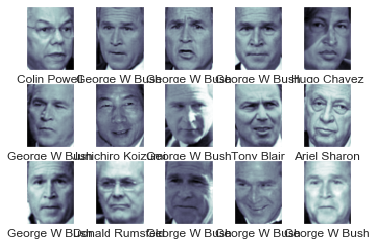

In [6]:
fig,ax=plt.subplots(3,5)
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [7]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,test_size=0.2,random_state=42)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

C:\Users\vinu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'svc__C': 10, 'svc__gamma': 0.001}


In [26]:
model=grid.best_estimator_
yfit=model.predict(Xtest)

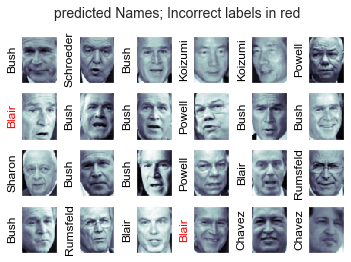

In [27]:
fig, ax=plt.subplots(4,6)
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i]==ytest[i] else 'red')
fig.suptitle('predicted Names; Incorrect labels in red',size=14);

In [28]:
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.69      0.75      0.72        12
     Colin Powell       0.85      0.88      0.87        51
  Donald Rumsfeld       0.78      0.84      0.81        25
    George W Bush       0.93      0.87      0.90        98
Gerhard Schroeder       0.89      0.76      0.82        21
      Hugo Chavez       0.91      0.67      0.77        15
Junichiro Koizumi       0.83      1.00      0.91        10
       Tony Blair       0.76      0.89      0.82        38

         accuracy                           0.85       270
        macro avg       0.83      0.83      0.83       270
     weighted avg       0.86      0.85      0.85       270



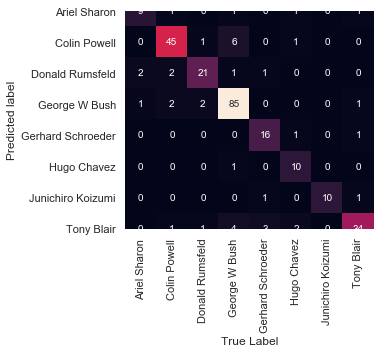

In [29]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(ytest,yfit)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted label');